## Library Import

In [1]:
import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt 
% matplotlib inline

/home/shseo/anaconda3/envs/shseo_env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.9.0


## Hellow World

In [2]:
h = "Hello"
w = "World!"
hw = h + w
print(hw)

HelloWorld!


In [3]:
h = tf.constant("Hello")
w = tf.constant(" World!")
hw = h + w
print(hw)

Tensor("add:0", shape=(), dtype=string)


In [4]:
h = tf.constant("Hello")
w = tf.constant(" World!")
hw = h + w

with tf.Session() as sess:
    ans = sess.run(hw)

print(ans)

b'Hello World!'


## First graph


In [5]:
a = tf.constant(5) 
b = tf.constant(2)
c = tf.constant(3)
d = tf.multiply(a,b) 
e = tf.add(c,b) 
f = tf.subtract(d,e) 
sess = tf.Session() 
outs = sess.run(f) 
sess.close() 
print("outs = {}".format(outs))

outs = 5


## Exercise 1 Make a Graph
![graph](./graph.PNG)

### graph A
#### a = 5, b = 2

outs = -5.666666666666667


### graph B
#### a = 5, b = 2

outs = 2.5440211296081543


## Construction and managing our graph

In [8]:
print(tf.get_default_graph())

g = tf.Graph()
print(g)

In [9]:
a = tf.constant(5) 

print(a.graph is g)
print(a.graph is tf.get_default_graph())

False
True


In [10]:
g1 = tf.get_default_graph() 
g2 = tf.Graph() 

print(g1 is tf.get_default_graph())

with g2.as_default(): 
    print(g1 is tf.get_default_graph())

print(g1 is tf.get_default_graph())

True
False
True


## Fetches

In [11]:
#our first graph

a = tf.constant(5) 
b = tf.constant(2)
c = tf.constant(3)
d = tf.multiply(a,b) 
e = tf.add(c,b) 
f = tf.subtract(d,e) 
sess = tf.Session() 
outs = sess.run(f) 
sess.close() 
print("outs = {}".format(outs))

outs = 5


In [12]:
with tf.Session() as sess:
    fetches = [a,b,c,d,e,f]
    outs = sess.run(fetches) 

print("outs = {}".format(outs))
print(type(outs[0]))

outs = [5, 2, 3, 10, 5, 5]
<class 'numpy.int32'>


## Nodes are operations, edges are Tensor objects

In [13]:
c = tf.constant(4.0)
print(c)

Tensor("Const_15:0", shape=(), dtype=float32)


## Data types

In [14]:
c = tf.constant(4.0, dtype=tf.float64)
print(c)
print(c.dtype)

Tensor("Const_16:0", shape=(), dtype=float64)
<dtype: 'float64'>


In [15]:
x = tf.constant([1,2,3],name='x',dtype=tf.float32) 
print(x.dtype)
x = tf.cast(x,tf.int64)
print(x.dtype)

<dtype: 'float32'>
<dtype: 'int64'>


## Tensor arrays and Shapes

In [16]:
import numpy as np 

c = tf.constant([[1,2,3],
                 [4,5,6]]) 
print("Python List input: {}".format(c.get_shape()))

c = tf.constant(np.array([
                 [[1,2,3], 
                  [4,5,6]], 

                 [[1,1,1], 
                  [2,2,2]]
                 ])) 

print("3d Numpy array input: {}".format(c.get_shape()))

Python List input: (2, 3)
3d Numpy array input: (2, 2, 3)


(1, 50000)


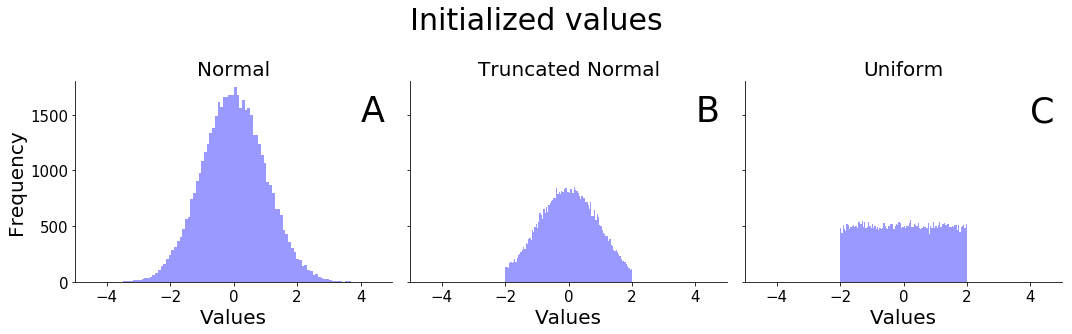

In [17]:
sess = tf.InteractiveSession()

# === Noramal and Truncated normal distributions ===
mean = 0
std = 1
x_normal = tf.random_normal((1,50000),mean,std).eval()
x_truncated = tf.truncated_normal((1,50000),mean,std).eval()

# === Uniform distribution
minval = -2 
maxval = 2
x_uniform = tf.random_uniform((1,50000),minval,maxval).eval()

sess.close()


def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
#     ax.set_ylim([-1.1,1.1])
    ax.tick_params(axis='both', which='major', labelsize=15)
    
def get_axis_limits(ax, scale=.8):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

f,axarr = plt.subplots(1,3,figsize=[15,4],sharey=True)
titles = ['Normal','Truncated Normal','Uniform']

print(x_normal.shape)
for i,x in enumerate([x_normal,x_truncated,x_uniform]):
    ax = axarr[i]
    ax.hist(x[0],bins=100,color='b',alpha=0.4)
    ax.set_title(titles[i],fontsize=20)
    ax.set_xlabel('Values',fontsize=20)
    ax.set_xlim([-5,5])
    ax.set_ylim([0,1800])
    
    simpleaxis(ax)
    
    
axarr[0].set_ylabel('Frequency',fontsize=20)
plt.suptitle('Initialized values',fontsize=30, y=1.15)


for ax,letter in zip(axarr,['A','B','C']):
    simpleaxis(ax)
    ax.annotate(letter, xy=get_axis_limits(ax),fontsize=35)

plt.tight_layout()

plt.savefig('histograms.png', bbox_inches='tight', format='png', dpi=200, pad_inches=0,transparent=True)

plt.show()

In [18]:
sess = tf.InteractiveSession()
c = tf.linspace(0.0, 4.0, 5) 
print("The content of 'c':\n {}\n".format(c.eval()))
sess.close()

The content of 'c':
 [0. 1. 2. 3. 4.]



## Matrix multiplication

In [19]:
A = tf.constant([ [1,2,3],
                  [4,5,6] ])
print(a.get_shape())

x = tf.constant([1,0,1])
print(x.get_shape())

x = tf.expand_dims(x,1)
print(x.get_shape())

b = tf.matmul(A,x)

sess = tf.InteractiveSession()
print('matmul result:\n {}'.format(b.eval()))
sess.close()

()
(3,)
(3, 1)
matmul result:
 [[ 4]
 [10]]


## Names

In [20]:
with tf.Graph().as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    c2 = tf.constant(4,dtype=tf.int32,name='c') 
print(c1.name)
print(c2.name)

c:0
c_1:0


## Name Scopes

In [21]:
with tf.Graph().as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    with tf.name_scope("prefix_name"):
        c2 = tf.constant(4,dtype=tf.int32,name='c') 
        c3 = tf.constant(4,dtype=tf.float64,name='c')

print(c1.name)
print(c2.name)
print(c3.name)

c:0
prefix_name/c:0
prefix_name/c_1:0


## Variables

In [22]:
init_val = tf.random_normal((1,5),0,1)
var = tf.Variable(init_val, name='var') 
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)

print("\npost run: \n{}".format(post_var))

pre run: 
<tf.Variable 'var:0' shape=(1, 5) dtype=float32_ref>

post run: 
[[ 1.537045   -0.04572339  0.7334038   0.11660513  0.71818864]]


## New variables are created each time

In [23]:
init_valinit_val = tf.random_normal((1,5),0,1)
var = tf.Variable(init_val, name='var') 
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)

print("\npost run: \n{}".format(post_var))

pre run: 
<tf.Variable 'var_1:0' shape=(1, 5) dtype=float32_ref>

post run: 
[[ 1.64751    -0.863329    0.62202734  2.369146   -0.6367952 ]]


## Placeholders

In [24]:
x_data = np.random.randn(5,10) 
w_data = np.random.randn(10,1) 

with tf.Graph().as_default():
    x = tf.placeholder(tf.float32,shape=(5,10))
    w = tf.placeholder(tf.float32,shape=(10,1))
    b = tf.fill((5,1),-1.) 
    xw = tf.matmul(x,w)

    xwb = xw + b
    s = tf.reduce_max(xwb)
    with tf.Session() as sess:
        outs = sess.run(s,feed_dict={x: x_data,w: w_data}) 

print("outs = {}".format(outs))

outs = 5.372379302978516
